# Stats analysis of chapter 2

Looking at Fluctuating Asymmetry (FA) as a function of distance to range edge and forest cover

### Load packages

In [1]:
library(brms) # for Bayesian analysis
library(tidyverse) # for tidy code
library(egg) # for nice professional figures
library(lme4) # for frequentist analysis
library(lmerTest) # for p-values
library(GGally) # for ggpairs

Loading required package: Rcpp

Loading 'brms' package (version 2.16.1). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


Attaching package: ‘brms’


The following object is masked from ‘package:stats’:

    ar


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching p

In [2]:
getwd()

[1] "/Users/tom/OneDrive - Imperial College London/1.PHD/2.R-dir/2.chapter/2.notebook"

### Load forest cover data

In [3]:
FC <- read_csv("../2.data_cleaned/FC_calculated.csv", 
               col_types = cols(
                  species = col_character(),  # load column as character
                  bird_id = col_character()
                    )) %>% dplyr::select(-"X0")

In [4]:
# head(FC)

#### Make sure that all NAs in column percentage of FC are zeros
The function used to calculate FC in the previous script would give NAs if the landscape metric 'proportion of class' (3 for FC in MAPBIOMAS) was innexistent. That means that forest cover was innexistent, therefore NA = 0%. That happened often for smaller buffer radius like 100 m.  

In [5]:
FC$FC_percentage.value[is.na(FC$FC_percentage.value)] <- 0

### Load distance to range edge data

In [6]:
dist <- read_csv("../2.data_cleaned/NHM-MZUSP_dist2edge_data.csv")%>%
  dplyr::select(-c(13:14)) %>%  # remove unnecessary columns
  dplyr::select(-c("feather_tail", "distance", "sex")) %>% # remove some more unnecessary columns
  filter(inrange == TRUE) # keep only specimens inside the range


── Column specification ────────────────────────────────────────────────────────
cols(
  species = col_character(),
  subspecies = col_character(),
  date_collected = col_double(),
  bird_id = col_character(),
  lon_dd = col_double(),
  lat_dd = col_double(),
  location = col_character(),
  sex = col_character(),
  feather_tail = col_character(),
  source = col_character(),
  distance = col_double(),
  inrange = col_logical(),
  in_costal_margin = col_logical(),
  distance_sgn = col_double(),
  dist_km = col_double()
)




In [7]:
 head(dist)

species,subspecies,date_collected,bird_id,lon_dd,lat_dd,location,source,inrange,dist_km
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<lgl>,<dbl>
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,"Aguas Mornas, SC, Brasil",MZUSP,TRUE,573.7955
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,"Morro Grande, Nova Roma, Pousada Rancho Fundo, SC, Brasil",MZUSP,TRUE,438.8556
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,"Guaraqueçaba, Utinga, PR, Brasil",MZUSP,TRUE,737.7786
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2002,75697,-49.80359,-23.87488,"Wenceslau Bras, PR, Brasil",MZUSP,TRUE,521.2166
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2002,75631,-50.00111,-23.93333,"Fazenda Chapadão, Pinhalão, PR, Brasil",MZUSP,TRUE,512.9594
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2012,93205,-45.88944,-23.65417,"Estacao Biologica de Boraceia, Salesópolis, SP, Brasil",MZUSP,TRUE,689.6465


### Load FA data

In [8]:
# load fluctuating asymmetry data
FA <-read_csv("../2.data_cleaned/fa/NHM-MZUSP_fa_wing_tarsus.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  species = col_character(),
  subspecies = col_character(),
  date_collected = col_double(),
  bird_id = col_character(),
  lon_dd = col_double(),
  lat_dd = col_double(),
  sex = col_character(),
  source = col_character(),
  type = col_character(),
  unit = col_character(),
  mean_l = col_double(),
  mean_r = col_double(),
  sd_l = col_double(),
  sd_r = col_double(),
  fa_left_right = col_double(),
  fa_ratio = col_double(),
  fa_abs_mm = col_double()
)




In [9]:
head(FA)

species,subspecies,date_collected,bird_id,lon_dd,lat_dd,sex,source,type,unit,mean_l,mean_r,sd_l,sd_r,fa_left_right,fa_ratio,fa_abs_mm
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,female,MZUSP,w,mm,88.50000,87.84000,0.05000000,0.08717798,0.6600000,1.0075137,0.6600000
Automolus_leucophthalmus,Automolus_leucophthalmus_leucophthalmus,2016,104089,-48.85236,-27.81322,female,MZUSP,t,mm,22.88667,23.14000,0.08020806,0.14422205,-0.2533333,0.9890521,0.2533333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,na,MZUSP,w,mm,89.97000,90.95333,0.01000000,0.05033223,-0.9833333,0.9891886,0.9833333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91247,-49.80011,-28.70533,na,MZUSP,t,mm,22.70333,21.84333,0.12662280,0.05507571,0.8600000,1.0393713,0.8600000
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,female,MZUSP,w,mm,83.42333,83.01000,0.13576941,0.05000000,0.4133333,1.0049793,0.4133333
Automolus_leucophthalmus,Automolus_leucophthalmus_sulphuracens,2010,91248,-48.23111,-25.20336,female,MZUSP,t,mm,21.84000,21.24667,0.03464102,0.14502873,0.5933333,1.0279259,0.5933333


### Manipulate FA data for analysis

Join FA dataset to the distances dataset

In [10]:
FA_data <- dist %>% dplyr::left_join(FA) 

Joining, by = c("species", "subspecies", "date_collected", "bird_id", "lon_dd", "lat_dd", "source")



Now join the FA and dist data set to the forest cover dataset and remove Thalurania glaucopis tarsus. This species has very short tarsus covered by feathers, which impeded me to measure it with any precision, as I could not see the back notch of the intertarsal joint without damaging the specimen. Therefore tarsus shows as 9999 in the original dataset and as 0 in the dataset used here.  

In [11]:
FA_FC_data <- FA_data %>% dplyr::left_join(FC) %>%
    filter(source == "MZUSP")%>%
    mutate(to_remove = ifelse(species == "Thalurania_glaucopis" & type == "t", 1,0))%>% # first transform all Thalurania AND tarsus to = 1 and everything else to =0
    filter(to_remove == 0) # keep only =0 observations

names(FA_FC_data)

Joining, by = c("species", "bird_id", "lon_dd", "lat_dd", "dist_km")



[1] "species"             "subspecies"          "date_collected"     
 [4] "bird_id"             "lon_dd"              "lat_dd"             
 [7] "location"            "source"              "inrange"            
[10] "dist_km"             "sex"                 "type"               
[13] "unit"                "mean_l"              "mean_r"             
[16] "sd_l"                "sd_r"                "fa_left_right"      
[19] "fa_ratio"            "fa_abs_mm"           "decade"             
[22] "biome"               "geometry"            "file_name"          
[25] "FC_buffer"           "FC_percentage.value" "to_remove"

### Inspect FA data

Look at the histogram of FA variance (difference between left and right). 

Warning message:
“Removed 40 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 40 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 40 rows containing non-finite values (stat_ydensity).”


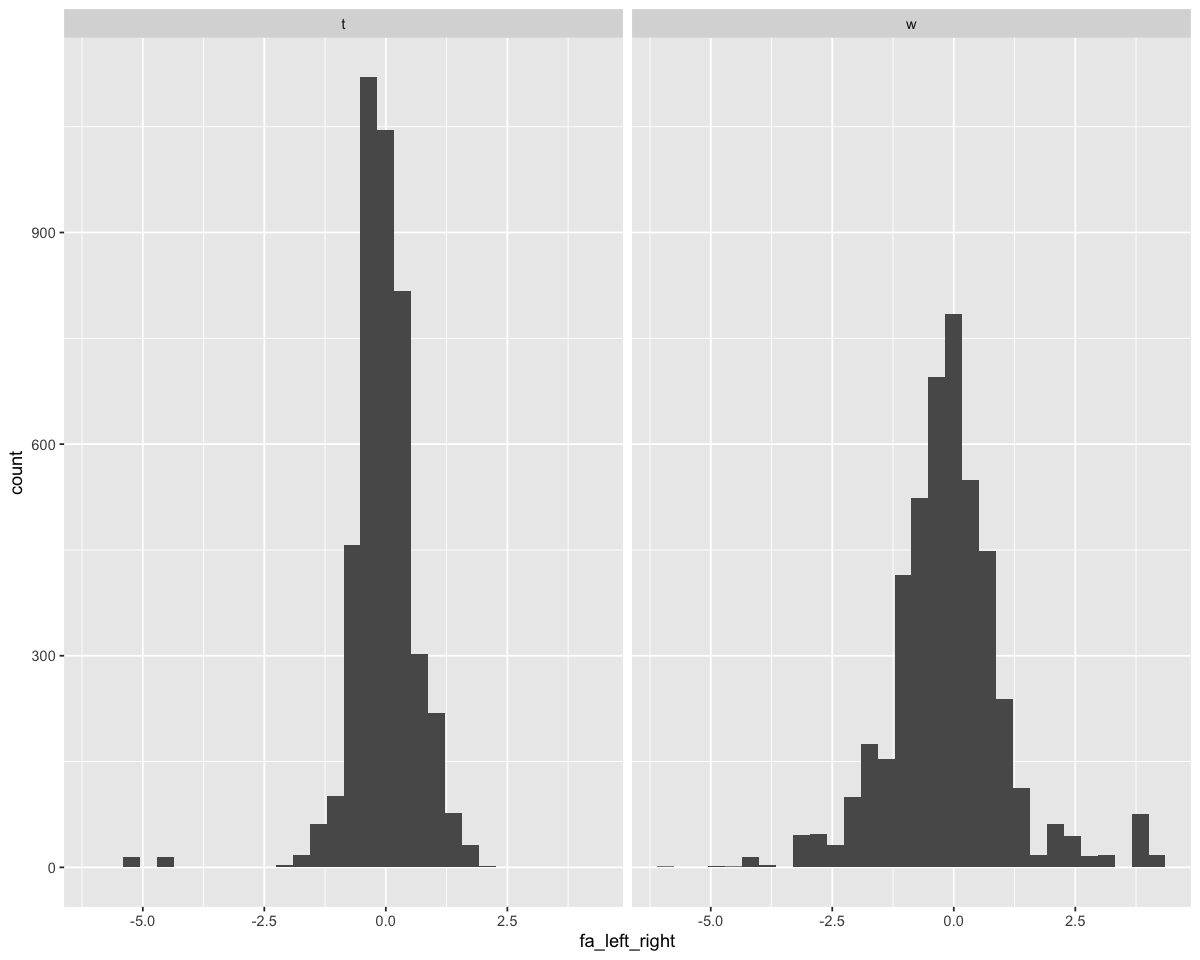

Warning message:
“Removed 40 rows containing non-finite values (stat_ydensity).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


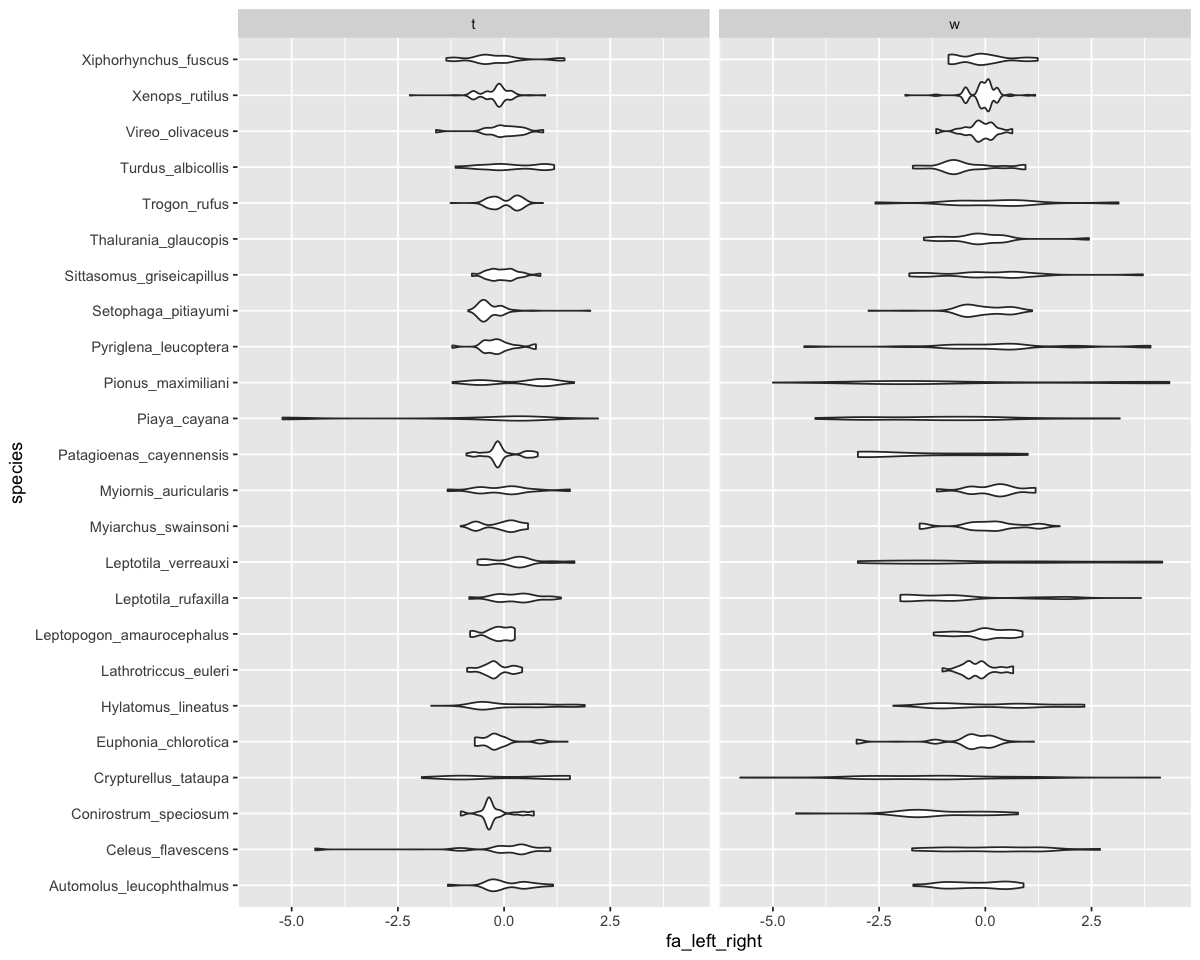

Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 2 rows containing missing values”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing non-finite values (stat_density).”


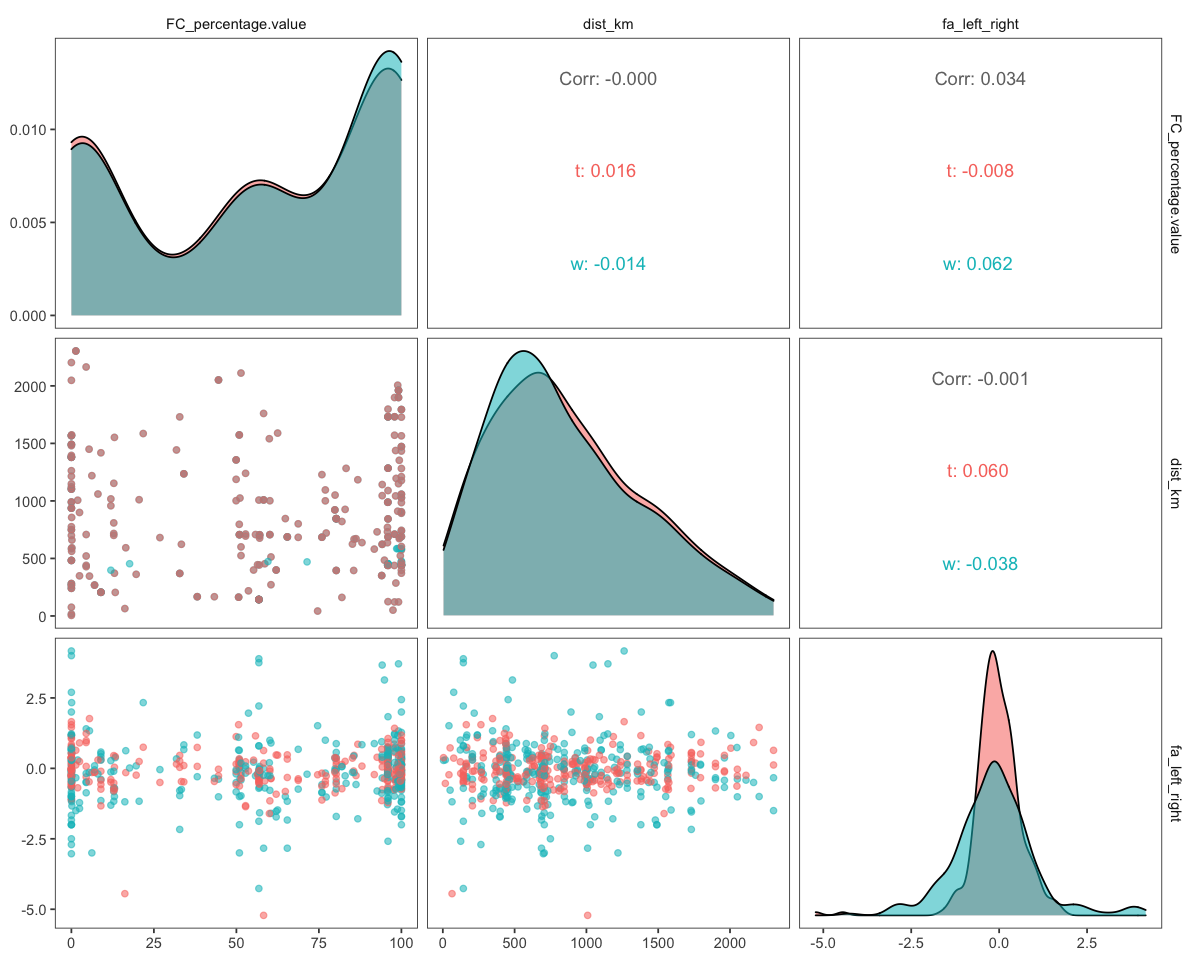

In [12]:
options(repr.plot.width=10, repr.plot.height=8)

plot_hist <- ggplot(FA_FC_data, aes(x=fa_left_right)) + 
              geom_histogram(bins = 30)+
              facet_wrap(~type)
plot_hist
ggsave("../2.results/plots/FA_left_right_hist.png", plot_hist, width = 7, height=7, units="in")

##
plot_violin <- ggplot(FA_FC_data, aes(x=fa_left_right, y=species)) + 
                geom_violin()+
                facet_wrap(~type)
plot_violin
ggsave("../2.results/plots/FA_left_right_per_species.png", plot_violin, width = 7, height=8, units="in")

##
plot_pairs <- FA_FC_data %>%
                filter(FC_buffer == 600) %>%
                ggpairs(columns = c('FC_percentage.value', 'dist_km', 'fa_left_right'), 
                    ggplot2::aes(colour=type, alpha=0.8))+
                    theme_article()
plot_pairs
ggsave("../2.results/plots/Fa_FC_600_dist.png", plot_pairs, width = 7, height=7, units="in")
 

I use the variance in the signed difference between L and R as a measure of FA. This is because it is suggested in this [paper](https://resjournals.onlinelibrary.wiley.com/doi/epdf/10.1046/j.1365-2311.2000.00204.x). I dont explicitly correct for size of the trait because according to this [other paper](http://www.biology.ualberta.ca/palmer.hp/asym/FA/Primer.pdf), page 25, '10.2 Test for size dependence of FA between samples' there seems to be no pattern in my data to justify the scaling ("Arbitrary correction for presumed size-dependence can lead to spurious differences among samples.

`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”
`geom_smooth()` using formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


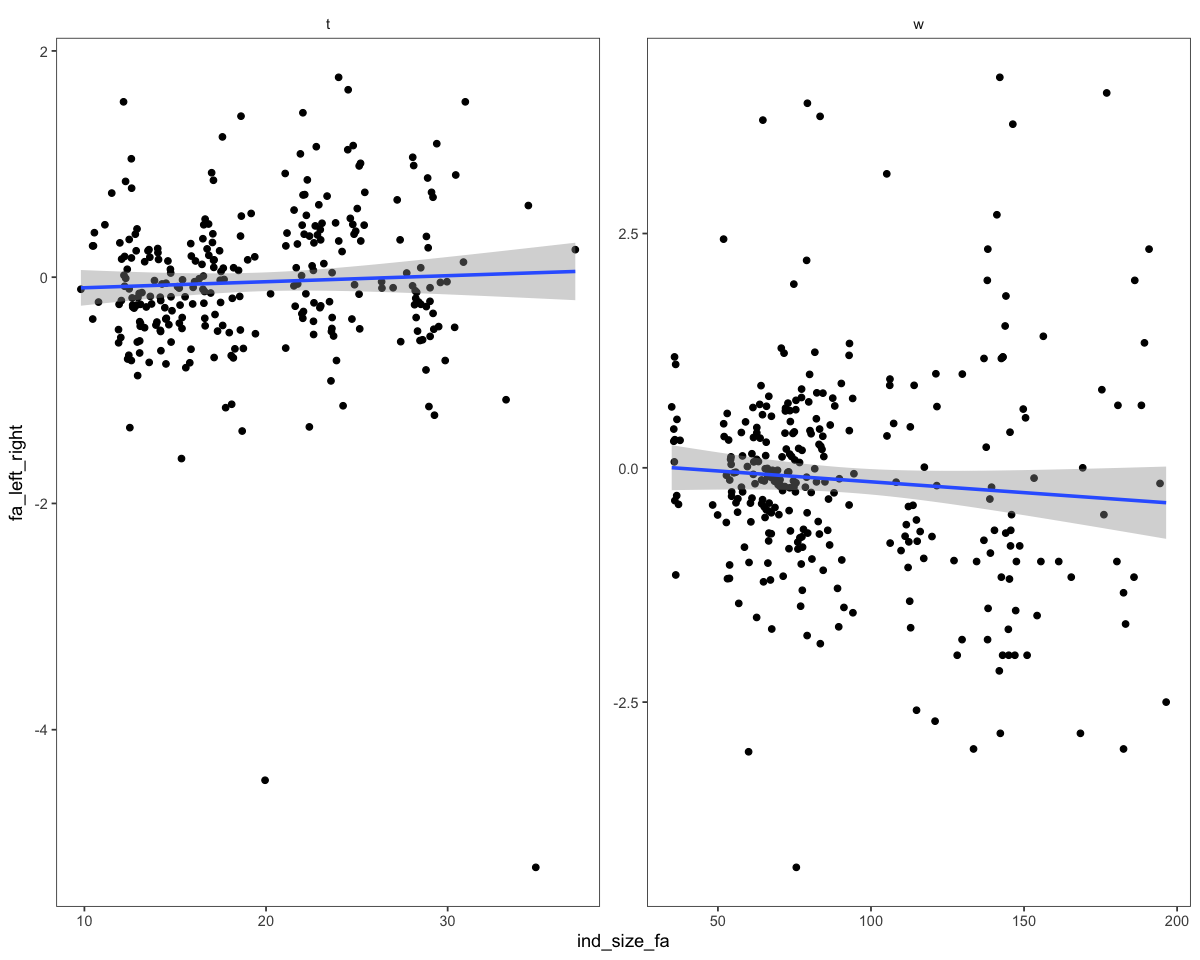

In [13]:
# regression of (R-L) against measure of body size

plot_FA_ind_size <- FA_FC_data %>%
        mutate(ind_size_fa = (mean_l + mean_r)/2)%>%
        filter(FC_buffer == 600) %>%
        ggplot(aes(x=ind_size_fa, y=fa_left_right))+
               geom_point()+
               geom_smooth(method = "lm")+
                facet_wrap(~type, scales = "free")+
                theme_article()

plot_FA_ind_size
ggsave("../2.results/plots/Fa_vs_ind_size.png",plot_FA_ind_size, width = 7, height=7, units="in")
 


## Model Fitting

Fit a model predicting variance as a function of distance to range edge plus a random effect of species on distance. Also filter out the individuals who are outside their range (sqrt_dist >0 )

In [14]:
FA_FC_data %>%
        write_csv("../FA_FC_final.csv")

In [15]:
FA_FC_data %>%
dplyr::filter(FC_buffer == 600)%>%
nrow()

FA_FC_data %>%
distinct(species)%>%
nrow()

FA_FC_data %>%
pull(date_collected)%>%
min()

[1] 574

[1] 24

[1] 1926

### Bayesian models for FA (wing)


In [129]:
#set.seed(1)

#bay_mod_t <- FA_FC_data %>%
#mutate(ind_size_fa = (mean_l + mean_r)/2)%>%
#filter(FC_buffer == 600, type == "t", dist_km >= 0) %>%
#brm(bf(fa_left_right ~ 0, sigma ~ log(dist_km) + (log(dist_km) | species)),
#    data = .,
#    family = gaussian,
#    cores = 4, chains = 4, iter = 10000, 
#    control=list(adapt_delta = 0.99))

Compiling Stan program...

Start sampling



In [ ]:
summary(bay_mod_t)

In [ ]:
options(repr.plot.width=10, repr.plot.height=15)

plot(bay_mod_t)

In [ ]:
options(repr.plot.width=5, repr.plot.height=5)

plot(conditional_effects(bay_mod_t), points = TRUE)

In [ ]:
hypothesis(bay_mod_t, "sigma_logdist_km < 0")

In [ ]:
FA_w_fit <- FA_FC_data %>%
            filter(type == "w") %>%
               brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist + (sqrt_dist|species), 
                   data = ., 
                   family = gaussian(link = "identity"),
                   cores = 4, chains = 4,
                        control = list(max_treedepth = 15))

In [ ]:
pairs(FA_w_fit)

In [ ]:
plot(FA_w_fit)

plot(conditional_effects(FA_w_fit), points = TRUE)

In [ ]:
hypothesis(FA_w_fit, "sqrt_dist < 0")

In [ ]:
FA_w_fit <- FA_FC_data %>%
            filter(dist_km >= 0, type == "w") %>%
               brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist + (sqrt_dist|species), 
                   data = ., 
                   family = gaussian(link = "identity"),
                   cores = 4, chains = 4)

### Bayesian models for FA (tarsus)


In [ ]:
FA_t_fit <- FA_FC_data %>%
            filter(type == "t") %>%
               brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist + (sqrt_dist|species), 
                   data = ., 
                   family = gaussian(link = "identity"),
                   prior = set_prior("normal(0,5)", class = "b"),
                   cores = 4, chains = 4, iter=5000)

In [ ]:
summary(FA_t_fit)

In [ ]:
plot(FA_t_fit)

plot(conditional_effects(FA_t_fit), points = TRUE)

In [ ]:
hypothesis(FA_t_fit, "sqrt_dist < 0")

In [ ]:
colnames(FA_FC_data)

### Bayesian models for FA (wing) with FC

First look at FA ~ dist to edge + forest cover + random effects.

(I increased the adapt_delta from the default 0.8 to 0.9 due to divergent interactions)

In [ ]:
FA_w_FC_fit <- FA_FC_data %>%
            filter(type == "w", FC_buffer == 600) %>%
                brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist * FC_percentage.value +(sqrt_dist|species), 
                    data = ., 
                    family = gaussian(link = "identity"),
                    prior = set_prior("normal(0,5)", class = "b"),
                    cores = 4, chains = 4, iter = 5000, 
                         control=list(adapt_delta = 0.9))

In [ ]:
summary(FA_w_FC_fit)

In [ ]:
pairs(FA_w_FC_fit)

In [ ]:
plot(FA_w_FC_fit)

plot(conditional_effects(FA_w_FC_fit), points = TRUE)

In [ ]:
hypothesis(FA_w_FC_fit, "sqrt_dist < 0")

In [ ]:
hypothesis(FA_w_FC_fit, "FC_percentage.value < 0")

In [ ]:
FA_t_FC_fit <- FA_FC_data %>%
            filter(type == "t", FC_buffer == 600) %>%
                brms::brm(formula = fa_trait_size_scaled ~ sqrt_dist * FC_percentage.value +(sqrt_dist|species), 
                    data = ., 
                    family = gaussian(link = "identity"),
                    prior = set_prior("normal(0,5)", class = "b"),
                    cores = 4, chains = 4, iter = 5000,
                         control=list(adapt_delta=0.9))

In [ ]:
summary(FA_t_FC_fit)

In [ ]:
plot(FA_t_FC_fit)

plot(conditional_effects(FA_t_FC_fit), points = TRUE)

In [ ]:
hypothesis(FA_t_FC_fit, "sqrt_dist < 0")

In [ ]:
hypothesis(FA_t_FC_fit, "FC_percentage.value < 0")

In [ ]:
save.image("../2.notebook/FA_analysis.RData")